In [1]:



























from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:

IMAGE_SIZE = [299,299] #[224, 224]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
     



Mounted at /content/drive


In [4]:

!ls '/content/drive/MyDrive/covid_and_non_xray_400_100/dataset_split' 

test  train


In [5]:
#Give dataset path
train_path = '/content/drive/MyDrive/covid_and_non_xray_400_100/dataset_split/train'
test_path = '/content/drive/MyDrive/covid_and_non_xray_400_100/dataset_split/test'

Working with 400 images
Image examples: 
COVID-101.png


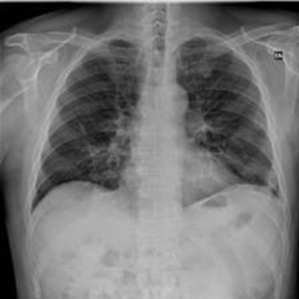

COVID-102.png


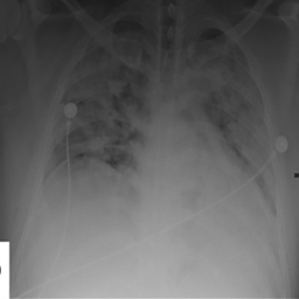

COVID-1.png


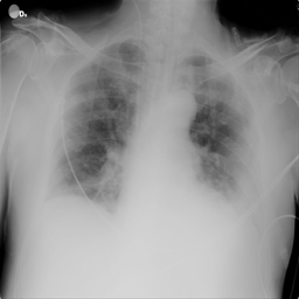

COVID-103.png


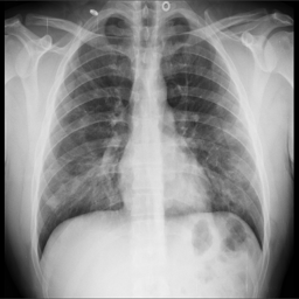

COVID-100.png


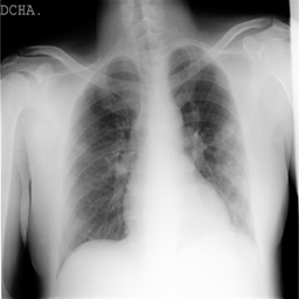

COVID-104.png


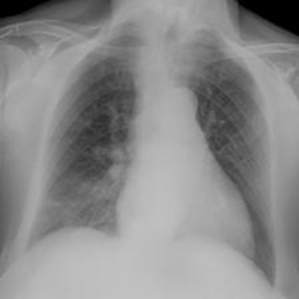

COVID-10.png


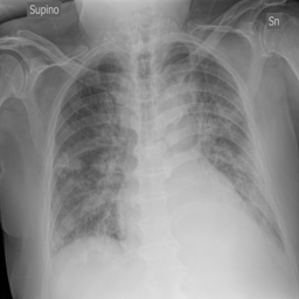

COVID-133.png


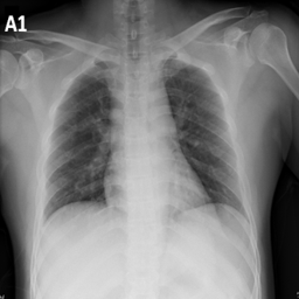

COVID-117.png


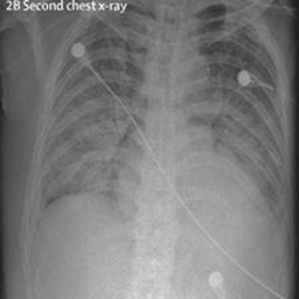

COVID-113.png


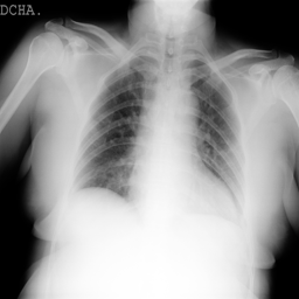

In [6]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/COVID'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [7]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [9]:
vgg.input

<KerasTensor: shape=(None, 299, 299, 3) dtype=float32 (created by layer 'input_1')>

In [10]:
for layer in vgg.layers:
  layer.trainable = False

In [11]:
folders = glob('/content/drive/MyDrive/covid_and_non_xray_400_100/dataset_split/train/*')
print(len(folders))

2


In [12]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 299, 299, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 299, 299, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 149, 149, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 149, 149, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 149, 149, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 74, 74, 128)       0     

In [13]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
  

In [14]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [15]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [16]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (299, 299),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 800 images belonging to 2 classes.


In [17]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (299, 299),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 200 images belonging to 2 classes.


In [18]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()
model_history=model.fit(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


# train_generator = data_gen_train.flow_from_directory(train_path, target_size=(128,128), batch_size=128, class_mode="binary")

# valid_generator = data_gen_valid.flow_from_directory(test_path, target_size=(128,128), batch_size=128, class_mode="binary")

# # model.fit(train_generator, epochs=2, validation_data=valid_generator) 

# model_history=model.fit(
#   train_generator,
#   validation_data=valid_generator,
#   epochs=10,
#   steps_per_epoch=5,
#   validation_steps=32,
#     callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10



Epoch 1: val_loss improved from inf to 3.37539, saving model to mymodel.h5
5/5 - 277s - loss: 5.7965 - accuracy: 0.6125 - val_loss: 3.3754 - val_accuracy: 0.7650 - 277s/epoch - 55s/step
Epoch 2/10


5/5 - 118s - loss: 3.2446 - accuracy: 0.8188 - 118s/epoch - 24s/step
Epoch 3/10


5/5 - 123s - loss: 2.1438 - accuracy: 0.8875 - 123s/epoch - 25s/step
Epoch 4/10


5/5 - 119s - loss: 1.8390 - accuracy: 0.9062 - 119s/epoch - 24s/step
Epoch 5/10


5/5 - 121s - loss: 1.6137 - accuracy: 0.8938 - 121s/epoch - 24s/step
Epoch 6/10


5/5 - 123s - loss: 1.3408 - accuracy: 0.9125 - 123s/epoch - 25s/step
Epoch 7/10


5/5 - 130s - loss: 1.0116 - accuracy: 0.9062 - 130s/epoch - 26s/step
Epoch 8/10


5/5 - 122s - loss: 1.1600 - accuracy: 0.8875 - 122s/epoch - 24s/step
Epoch 9/10


5/5 - 124s - loss: 1.3514 - accuracy: 0.9375 - 124s/epoch - 25s/step
Epoch 10/10


5/5 - 124s - loss: 0.8079 - accuracy: 0.9563 - 124s/epoch - 25s/step
Training completed in time:  0:25:27.809644


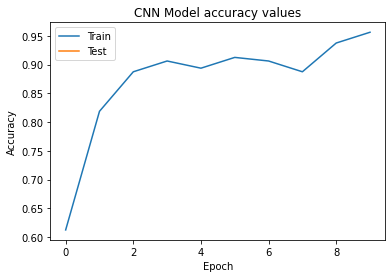

In [19]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/covid_and_non_xray_400_100/dataset_split/save1/')

In [23]:
model99=keras.models.load_model('mymodel.h5')

NameError: ignored

In [22]:
predictionsss=model99.predict('/content/drive/MyDrive/covid_and_non_xray_400_100/dataset_split/test/COVID-484.png')
print(predictionsss)

AttributeError: ignored